# 1917 영화 댓글 Preprocessing

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import math
import time

## Naver 영화 페이지의 '1917'영화 댓글 Crawling

In [2]:
# Chromedriver로 chrome browser 실행
path = '/Users/wolee-mac/WorkSpace/chromedriver'
browser = webdriver.Chrome( path )

# Naver 영화 페이지의 '1917'영화 페이지 이동
url = 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=187321'
browser.get( url )

# 평점에 더보기 링크 클릭
view_more = browser.find_element_by_xpath( '//*[@id="content"]/div[1]/div[4]/div[5]/div[2]/div[1]/a' )
view_more.click()

browser.switch_to_frame( browser.find_element_by_id( 'pointAfterListIframe' ) )

/Users/wolee-mac/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: use driver.switch_to.frame instead
  del sys.path[0]


In [3]:
# 전체 댓글수에 따른 페이지 계산
html0 = browser.page_source
html1 = BeautifulSoup( html0, 'lxml' )
html2 = html1.find( 'div', { 'class': 'score_total' } ).find( 'strong' ).findChildren( 'em' )[ 0 ].getText()
total_comment = int( html2.replace(',', '') )
total_page = total_comment / 10

print( total_comment )
print( total_page )
print( math.trunc( total_page ) )

3531
353.1
353


In [4]:
movie_comments = []

for page in range( 0, math.trunc( total_page ) ): # 전체 페이지를 이동
    time.sleep( 1 ) #1초의 시간 delay
    html0 = browser.page_source #selenuim에서 현재 있는 browser의 페이지 소스 불러오기
    html1 = BeautifulSoup( html0, 'lxml') #bs4를 이용하여 html로 파싱하기
    html2 = html1.find( 'div', { 'class': 'ifr_area basic_ifr' } ) #댓글을 포함하고 있는 tag찾기
    review0 = html2.find( 'div', { 'class': 'score_result' } ).find_all( 'li' ) #각 댓글별로 list화
    
    for i in range( len( review0 ) ): #한페이지 내에서 모든 댓글을 수집하기 위한 반복문
        review = review0[ i ].find( 'div',{ 'class': 'score_reple' } ).find( 'span' ).text.strip() #댓글
        if review not in '관람객': # 불필요한 내용 삭제
            movie_comments.append( review + '\n' )
        
    #다음페이지로 넘어가기
    if page == 0:
        browser.find_elements_by_xpath('//*[@class = "paging"]/div/a')[10].click()
    else:
        browser.find_elements_by_xpath('//*[@class = "paging"]/div/a')[11].click()


In [6]:
print( movie_comments[ :30 ] )

['충무로: 이거 어케하는거냐?\n', '촬영감독의 영혼까지 갈아넣은 마스터피스\n', '오스카 작품상 탔어도 할말 없었을것 같다.\n', '주인공을 카메라가 계속 따라가는데.. 세트장이 엄청 넓은거에 놀랐습니다. 직접 1차대전에 참전하는 느낌.. 이때당시 군인들 20년뒤 히틀러라는 극악의 악마로 자식들 다 전장에 몰리고 더 최악의 고통을 받을껀데 참.....\n', '닥터스트레인지의 판단력이 좋았다.\n', '아카데미 작품상이야 작품전체를 보는거니 기생충이 받을수도 있다고 보는데 감독상은 1917 줬어도 할말 없음. 감독의 참신성이 빛을 발함. 결론적으로 아카데미 작품상과 감독상을 1917이 받았어도 아무 할말 없는 것이...\n', '솔직히 연출력만으로 최고의 영화다. 마치 우리가 투명인간이 되서 그들을 지켜보는 듯했다. 마지막장면은 영화 내내 쉴시간이 없었던것에 대한 피로감을 풀어줘서 기승전결도 완벽.\n', '스포일러가 포함된 감상평입니다. 감상평 보기\n', '솔직히 나는 기생충보다 이영화가 더 재미있었다.\n', '진짜 원테이크 장면 너무 긴거 아님?? 촬영하기 진짜 힘들었을 듯...\n', '막판에 횡으로 수많은 병사가 신호와 함께 우르르 튀어나올때 주인공 혼자 종으로 막 달리는 장면 와 진짜ㅋㅋㅋㅋ대박 무조건 아이맥스로 보세요!\n', '원테이크 촬영신은 볼때마다 대단하다 후보에 오를만 했음\n', '스포일러가 포함된 감상평입니다. 감상평 보기\n', '일단..극장에서 보는걸  추천드립니다.카메라감독 상 줘야 할판  엄청나게  잘 찍음\n', '솔직히 샘 멘데스 감독 좀 억울할듯기생충도 재밌게 봤지만, 이거 보고나서 좀 억울했겠다는 생각이 팍듬..\n', '동료를 잃고 목숨을 잃을 위기를 극복해나가며 달려 얻은 것은 전쟁의 무의미함과 허무함 뿐.\n', '기생충이 그냥 백인이 나온 헐리우드 영화였다면 절대 1917을 이기지 못했을것. 1917은 오히려 백인의 헐리우드 영화라 차별받음. 진짜 근래 보기 드믄 명작\n', '전쟁이 끝나는 길은 마지막

In [8]:
# 파일 저장
with open( 'comment_1917.txt', 'w', encoding = 'utf-8' ) as f:
    for comment in movie_comments:
        f.write( comment + '\n' )

In [2]:
# 파일에서 load
movie_comments = []
with open( 'comment_1917.txt', 'r', encoding = 'utf-8' ) as f:
    lines = f.readlines()
    for line in lines:
        movie_comments.append( line.rstrip( '\n' ) )

In [3]:
print( movie_comments[ :30 ] )

['충무로: 이거 어케하는거냐?', '', '촬영감독의 영혼까지 갈아넣은 마스터피스', '', '오스카 작품상 탔어도 할말 없었을것 같다.', '', '주인공을 카메라가 계속 따라가는데.. 세트장이 엄청 넓은거에 놀랐습니다. 직접 1차대전에 참전하는 느낌.. 이때당시 군인들 20년뒤 히틀러라는 극악의 악마로 자식들 다 전장에 몰리고 더 최악의 고통을 받을껀데 참.....', '', '닥터스트레인지의 판단력이 좋았다.', '', '아카데미 작품상이야 작품전체를 보는거니 기생충이 받을수도 있다고 보는데 감독상은 1917 줬어도 할말 없음. 감독의 참신성이 빛을 발함. 결론적으로 아카데미 작품상과 감독상을 1917이 받았어도 아무 할말 없는 것이...', '', '솔직히 연출력만으로 최고의 영화다. 마치 우리가 투명인간이 되서 그들을 지켜보는 듯했다. 마지막장면은 영화 내내 쉴시간이 없었던것에 대한 피로감을 풀어줘서 기승전결도 완벽.', '', '스포일러가 포함된 감상평입니다. 감상평 보기', '', '솔직히 나는 기생충보다 이영화가 더 재미있었다.', '', '진짜 원테이크 장면 너무 긴거 아님?? 촬영하기 진짜 힘들었을 듯...', '', '막판에 횡으로 수많은 병사가 신호와 함께 우르르 튀어나올때 주인공 혼자 종으로 막 달리는 장면 와 진짜ㅋㅋㅋㅋ대박 무조건 아이맥스로 보세요!', '', '원테이크 촬영신은 볼때마다 대단하다 후보에 오를만 했음', '', '스포일러가 포함된 감상평입니다. 감상평 보기', '', '일단..극장에서 보는걸  추천드립니다.카메라감독 상 줘야 할판  엄청나게  잘 찍음', '', '솔직히 샘 멘데스 감독 좀 억울할듯기생충도 재밌게 봤지만, 이거 보고나서 좀 억울했겠다는 생각이 팍듬..', '']


In [4]:
# 여러 문장을 하나의 문자열로 변환
movie_str_comment = ''
for comment in movie_comments:
    movie_str_comment += comment
print( movie_str_comment[ :100 ] )

충무로: 이거 어케하는거냐?촬영감독의 영혼까지 갈아넣은 마스터피스오스카 작품상 탔어도 할말 없었을것 같다.주인공을 카메라가 계속 따라가는데.. 세트장이 엄청 넓은거에 놀랐습니다. 


### 특수문제 제거

In [5]:
import re

r = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'

In [6]:
# 문자열에 대한 특수문자 제거
movie_str_comment = re.sub( r, '', movie_str_comment )
print( movie_str_comment[ :100 ] )

충무로 이거 어케하는거냐촬영감독의 영혼까지 갈아넣은 마스터피스오스카 작품상 탔어도 할말 없었을것 같다주인공을 카메라가 계속 따라가는데 세트장이 엄청 넓은거에 놀랐습니다 직접 1차대


In [7]:
# 리스트에 있는 여러 문장에 대하여 각 문장별로 특수문자 제거
movie_new_comments = []
for comment in movie_comments:
    movie_new_comments.append( re.sub( r, '', comment ) )
    
print( movie_new_comments[ :30 ] )

['충무로 이거 어케하는거냐', '', '촬영감독의 영혼까지 갈아넣은 마스터피스', '', '오스카 작품상 탔어도 할말 없었을것 같다', '', '주인공을 카메라가 계속 따라가는데 세트장이 엄청 넓은거에 놀랐습니다 직접 1차대전에 참전하는 느낌 이때당시 군인들 20년뒤 히틀러라는 극악의 악마로 자식들 다 전장에 몰리고 더 최악의 고통을 받을껀데 참', '', '닥터스트레인지의 판단력이 좋았다', '', '아카데미 작품상이야 작품전체를 보는거니 기생충이 받을수도 있다고 보는데 감독상은 1917 줬어도 할말 없음 감독의 참신성이 빛을 발함 결론적으로 아카데미 작품상과 감독상을 1917이 받았어도 아무 할말 없는 것이', '', '솔직히 연출력만으로 최고의 영화다 마치 우리가 투명인간이 되서 그들을 지켜보는 듯했다 마지막장면은 영화 내내 쉴시간이 없었던것에 대한 피로감을 풀어줘서 기승전결도 완벽', '', '스포일러가 포함된 감상평입니다 감상평 보기', '', '솔직히 나는 기생충보다 이영화가 더 재미있었다', '', '진짜 원테이크 장면 너무 긴거 아님 촬영하기 진짜 힘들었을 듯', '', '막판에 횡으로 수많은 병사가 신호와 함께 우르르 튀어나올때 주인공 혼자 종으로 막 달리는 장면 와 진짜ㅋㅋㅋㅋ대박 무조건 아이맥스로 보세요', '', '원테이크 촬영신은 볼때마다 대단하다 후보에 오를만 했음', '', '스포일러가 포함된 감상평입니다 감상평 보기', '', '일단극장에서 보는걸  추천드립니다카메라감독 상 줘야 할판  엄청나게  잘 찍음', '', '솔직히 샘 멘데스 감독 좀 억울할듯기생충도 재밌게 봤지만 이거 보고나서 좀 억울했겠다는 생각이 팍듬', '']


## Text Proprocessing

### 형태소 분석

In [8]:
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt
import re

In [9]:
okt = Okt()

### 형태소 추출

In [10]:
morphemes = []

for comment in movie_new_comments:
    for morphs in okt.morphs( comment ):
        morphemes.append( morphs )
        
print( morphemes[ : 50 ] )

['충무로', '이', '거', '어케', '하는거냐', '촬영감독', '의', '영혼', '까지', '갈아', '넣은', '마스터피스', '오스카', '작품', '상', '탔어도', '할말', '없었을것', '같다', '주인공', '을', '카메라', '가', '계속', '따라가는데', '세트', '장이', '엄청', '넓은거에', '놀랐습니다', '직접', '1', '차', '대전', '에', '참전', '하는', '느낌', '이', '때', '당시', '군', '인들', '20년', '뒤', '히틀러', '라는', '극악', '의', '악마']


### 형태소 추출 및 어간 추출

In [11]:
morphemes = []

for comment in movie_new_comments:
    for morphs in okt.morphs( comment, stem = True ): # 어간 추출
        morphemes.append( morphs )
        
print( morphemes[ : 50 ] )

['충무로', '이', '거', '어케', '하다', '촬영감독', '의', '영혼', '까지', '갈아', '넣다', '마스터피스', '오스카', '작품', '상', '타다', '하다', '없다', '같다', '주인공', '을', '카메라', '가', '계속', '따라가다', '세트', '장이', '엄청', '넓다', '놀라다', '직접', '1', '차', '대전', '에', '참전', '하다', '느낌', '이', '때', '당시', '군', '인들', '20년', '뒤', '히틀러', '라는', '극악', '의', '악마']


### 행태소 추출 및 정규화 

In [12]:
morphemes = []

for comment in movie_new_comments:
    for morphs in okt.morphs( comment, norm = True ): # 정규화
        morphemes.append( morphs ) 
        
print( morphemes[ : 50 ] )

['충무로', '이', '거', '어떻게', '하는거냐', '촬영감독', '의', '영혼', '까지', '갈아', '넣은', '마스터피스', '오스카', '작품', '상', '탔어도', '할말', '없었을것', '같다', '주인공', '을', '카메라', '가', '계속', '따라가는데', '세트', '장이', '엄청', '넓은거에', '놀랐습니다', '직접', '1', '차', '대전', '에', '참전', '하는', '느낌', '이', '때', '당시', '군', '인들', '20년', '뒤', '히틀러', '라는', '극악', '의', '악마']


### 명사 분리

In [13]:
morphemes = []

for comment in movie_new_comments:
    for morphs in okt.nouns( comment ):
        morphemes.append( morphs )
        
print( morphemes[ : 100 ] )

['충무로', '거', '어케', '촬영감독', '영혼', '마스터피스', '오스카', '작품', '주인공', '카메라', '계속', '세트', '직접', '차', '대전', '참전', '느낌', '때', '당시', '군', '히틀러', '극악', '악마', '자식', '전장', '몰리', '더', '최악', '고통', '받을껀데', '닥터스', '트레인', '의', '판단력', '아카데미', '작품', '작품', '전체', '기생충', '감독', '감독', '참신', '빛', '발함', '결론', '아카데미', '작품', '상과', '감독', '이', '아무', '것', '연출', '최고', '영화', '마치', '우리', '투명인간', '그', '듯', '마지막', '장면', '영화', '내내', '시간', '대한', '피로', '감', '기승', '전결', '완벽', '스포일러', '포함', '감상', '평', '감상', '평', '보기', '나', '기생충', '이영화', '더', '진짜', '테이크', '장면', '촬영', '진짜', '듯', '막판', '횡', '병사', '신호', '우르르', '때', '주인공', '혼자', '종', '막', '장면', '진짜']


### 어절 분리

In [14]:
morphemes = []

for comment in movie_new_comments:
    for morphs in okt.phrases( comment ):
        morphemes.append( morphs )

print( morphemes[ : 100 ] )

['충무로', '충무로 이거', '충무로 이거 어케', '이거', '어케', '촬영감독', '촬영감독의 영혼', '마스터피스', '영혼', '오스카', '오스카 작품상', '작품상', '주인공', '카메라', '계속', '세트장이', '직접', '직접 1차대전', '참전', '참전하는 느낌', '참전하는 느낌 이때당시', '참전하는 느낌 이때당시 군', '20년', '히틀러', '극악', '극악의 악마', '자식들', '전장', '몰리', '더 최악', '더 최악의 고통', '받을껀데', '대전', '느낌', '이때', '당시', '악마', '최악', '고통', '닥터스트레인', '의 판단력', '닥터스', '트레인', '판단력', '아카데미', '아카데미 작품상', '작품전체', '기생충', '감독상', '1917', '감독', '감독의 참신성', '발함', '아카데미 작품상과', '아카데미 작품상과 감독상', '1917이', '아무', '아무 할말 없는 것', '작품상', '작품', '전체', '참신성', '상과', '연출력', '최고', '최고의 영화', '마치', '마치 우리', '투명인간', '그들', '마지막장면', '영화', '영화 내내', '영화 내내 쉴시간', '대한', '대한 피로감', '기승전결', '완벽', '우리', '마지막', '장면', '내내', '시간', '피로', '기승', '전결', '스포일러', '포함', '포함된 감상평', '감상평', '감상평 보기', '감상', '보기', '기생충', '이영화', '진짜', '진짜 원테이크', '진짜 원테이크 장면', '촬영', '진짜 힘들었을 듯']


### 품사 태깅

In [15]:
morphemes = []

for comment in movie_new_comments:
    for morphs in okt.pos( comment, join = True ):
        morphemes.append( morphs )

print( morphemes[ : 100 ] )

['충무로/Noun', '이/Determiner', '거/Noun', '어케/Noun', '하는거냐/Verb', '촬영감독/Noun', '의/Josa', '영혼/Noun', '까지/Josa', '갈아/Adverb', '넣은/Verb', '마스터피스/Noun', '오스카/Noun', '작품/Noun', '상/Suffix', '탔어도/Verb', '할말/Verb', '없었을것/Adjective', '같다/Adjective', '주인공/Noun', '을/Josa', '카메라/Noun', '가/Josa', '계속/Noun', '따라가는데/Verb', '세트/Noun', '장이/Suffix', '엄청/Adverb', '넓은거에/Adjective', '놀랐습니다/Verb', '직접/Noun', '1/Number', '차/Noun', '대전/Noun', '에/Josa', '참전/Noun', '하는/Verb', '느낌/Noun', '이/Determiner', '때/Noun', '당시/Noun', '군/Noun', '인들/Josa', '20년/Number', '뒤/Foreign', '히틀러/Noun', '라는/Josa', '극악/Noun', '의/Josa', '악마/Noun', '로/Josa', '자식/Noun', '들/Suffix', '다/Adverb', '전장/Noun', '에/Josa', '몰리/Noun', '고/Josa', '더/Noun', '최악/Noun', '의/Josa', '고통/Noun', '을/Josa', '받을껀데/Noun', '참/Verb', '닥터스/Noun', '트레인/Noun', '지/Josa', '의/Noun', '판단력/Noun', '이/Josa', '좋았다/Adjective', '아카데미/Noun', '작품/Noun', '상/Suffix', '이야/Josa', '작품/Noun', '전체/Noun', '를/Josa', '보는거니/Verb', '기생충/Noun', '이/Josa', '받을수도/Verb', '있다고/Adjective', '보는데/Ver

### 불용어 Load

In [16]:
stop_words = []

with open( 'stopwords.txt', 'r', encoding = 'utf-8' ) as f:
    lines = f.readlines()
    for line in lines:
        stop_words.append( line.rstrip( '\n' ) )

print( stop_words[ : 100 ] )

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다']


### 불용어 제거

In [17]:
results = []

for comment in movie_new_comments:
    for word in okt.morphs( comment ):
        if word not in stop_words:
            results.append( word )
        
print( results[ : 100 ] )

['충무로', '거', '어케', '하는거냐', '촬영감독', '영혼', '갈아', '넣은', '마스터피스', '오스카', '작품', '상', '탔어도', '할말', '없었을것', '주인공', '카메라', '계속', '따라가는데', '세트', '장이', '엄청', '넓은거에', '놀랐습니다', '직접', '1', '차', '대전', '참전', '하는', '느낌', '당시', '군', '인들', '20년', '뒤', '히틀러', '라는', '극악', '악마', '자식', '다', '전장', '몰리', '고', '더', '최악', '고통', '받을껀데', '닥터스', '트레인', '지', '판단력', '좋았다', '아카데미', '작품', '상', '이야', '작품', '전체', '보는거니', '기생충', '받을수도', '있다고', '보는데', '감독', '상', '은', '1917', '줬어도', '할말', '없음', '감독', '참신', '성', '빛', '발함', '결론', '적', '아카데미', '작품', '상과', '감독', '상', '1917', '받았어도', '아무', '할말', '없는', '솔직히', '연출', '력', '만으로', '최고', '영화', '다', '투명인간', '되서', '지켜보는', '듯']


### Integer Encoding

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts( results )

In [20]:
print( tokenizer.word_index )

{'영화': 1, '은': 2, '는': 3, '전쟁': 4, '한': 5, '테이크': 6, '도': 7, '연출': 8, '촬영': 9, '평': 10, '감상': 11, '진짜': 12, '적': 13, '전쟁영화': 14, '스토리': 15, '다': 16, '입니다': 17, '정말': 18, '몰입': 19, '롱': 20, '최고': 21, '작품': 22, '기생충': 23, '너무': 24, '상': 25, '기법': 26, '감': 27, '잘': 28, '내': 29, '느낌': 30, '주인공': 31, '만': 32, '된': 33, '수': 34, '원': 35, '보기': 36, '하는': 37, '꼭': 38, '감동': 39, '이다': 40, '게': 41, '인': 42, '생각': 43, '포함': 44, '안': 45, '스포일러': 46, '1': 47, '하고': 48, '있는': 49, '장면': 50, '못': 51, '말': 52, '영화관': 53, '감독': 54, '연기': 55, '1917': 56, '할': 57, '더': 58, '그냥': 59, '속': 60, '긴장감': 61, '처음': 62, '사람': 63, '영상': 64, '본': 65, '상미': 66, '중': 67, '없는': 68, '정도': 69, '보는': 70, '보다': 71, '점': 72, '보고': 73, '극장': 74, '카메라': 75, '아카데미': 76, '아이맥스': 77, '보세요': 78, '같은': 79, '마지막': 80, '듯': 81, '끝': 82, '차': 83, '거': 84, '인생': 85, '내내': 86, '볼': 87, '배우': 88, '해서': 89, '고': 90, '명작': 91, '코로나': 92, '평점': 93, '함': 94, '모든': 95, '씬': 96, '했다': 97, '걸': 98, '터': 99, '덩케르크': 100, '현장': 101, '이건': 102, '

In [21]:
print( tokenizer.word_counts )

OrderedDict([('충무로', 4), ('거', 81), ('어케', 11), ('하는거냐', 1), ('촬영감독', 20), ('영혼', 7), ('갈아', 7), ('넣은', 3), ('마스터피스', 14), ('오스카', 37), ('작품', 197), ('상', 186), ('탔어도', 5), ('할말', 11), ('없었을것', 1), ('주인공', 161), ('카메라', 90), ('계속', 51), ('따라가는데', 1), ('세트', 17), ('장이', 2), ('엄청', 29), ('넓은거에', 1), ('놀랐습니다', 2), ('직접', 18), ('1', 125), ('차', 82), ('대전', 37), ('참전', 10), ('하는', 147), ('느낌', 162), ('당시', 9), ('군', 7), ('인들', 1), ('20년', 2), ('뒤', 17), ('히틀러', 1), ('라는', 45), ('극악', 1), ('악마', 1), ('자식', 1), ('다', 240), ('전장', 50), ('몰리', 1), ('고', 75), ('더', 106), ('최악', 11), ('고통', 9), ('받을껀데', 1), ('닥터스', 5), ('트레인', 5), ('지', 54), ('판단력', 1), ('좋았다', 16), ('아카데미', 89), ('이야', 12), ('전체', 18), ('보는거니', 1), ('기생충', 194), ('받을수도', 1), ('있다고', 6), ('보는데', 7), ('감독', 110), ('은', 502), ('1917', 108), ('줬어도', 1), ('없음', 31), ('참신', 2), ('성', 26), ('빛', 7), ('발함', 1), ('결론', 6), ('적', 253), ('상과', 6), ('받았어도', 17), ('아무', 12), ('없는', 96), ('솔직히', 38), ('연출', 310), ('력', 54), ('만으로', 8), ('최고',

In [22]:
vocab_size = 50
tokenizer = Tokenizer()
tokenizer.fit_on_texts( results )

In [23]:
vocab_size = 50
words_frequency = [ w for w, c in tokenizer.word_index.items() if c >= vocab_size + 1 ] # 인덱스가 50 초과인 단어 제거
for w in words_frequency:
    del tokenizer.word_index[ w ] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[ w ] # 해당 단어에 대한 카운트 정보를 삭제

print( tokenizer.word_index )
print()
print( tokenizer.word_counts )
print()
print( tokenizer.texts_to_sequences( results ) )

{'영화': 1, '은': 2, '는': 3, '전쟁': 4, '한': 5, '테이크': 6, '도': 7, '연출': 8, '촬영': 9, '평': 10, '감상': 11, '진짜': 12, '적': 13, '전쟁영화': 14, '스토리': 15, '다': 16, '입니다': 17, '정말': 18, '몰입': 19, '롱': 20, '최고': 21, '작품': 22, '기생충': 23, '너무': 24, '상': 25, '기법': 26, '감': 27, '잘': 28, '내': 29, '느낌': 30, '주인공': 31, '만': 32, '된': 33, '수': 34, '원': 35, '보기': 36, '하는': 37, '꼭': 38, '감동': 39, '이다': 40, '게': 41, '인': 42, '생각': 43, '포함': 44, '안': 45, '스포일러': 46, '1': 47, '하고': 48, '있는': 49, '장면': 50}

OrderedDict([('작품', 197), ('상', 186), ('주인공', 161), ('1', 125), ('하는', 147), ('느낌', 162), ('다', 240), ('기생충', 194), ('은', 502), ('적', 253), ('연출', 310), ('최고', 205), ('영화', 1425), ('장면', 119), ('감', 172), ('도', 319), ('스포일러', 127), ('포함', 129), ('된', 160), ('감상', 268), ('평', 274), ('입니다', 240), ('보기', 148), ('는', 478), ('진짜', 266), ('원', 155), ('테이크', 362), ('너무', 193), ('촬영', 309), ('잘', 163), ('생각', 131), ('전쟁', 472), ('한', 410), ('이다', 140), ('안', 129), ('수', 159), ('있는', 122), ('롱', 219), ('내', 163), ('인', 132

In [24]:
vocab_size = 50
tokenizer = Tokenizer( num_words = vocab_size + 2, oov_token = 'OOV' ) 
# 빈도수 상위 50개 단어만 사용, 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts( results )

print( tokenizer.texts_to_sequences( results ) )

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [23], [26], [1], [1], [1], [32], [1], [1], [1], [1], [1], [1], [1], [1], [1], [48], [1], [1], [1], [38], [31], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [17], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [23], [26], [1], [23], [1], [1], [24], [1], [1], [1], [1], [26], [3], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [14], [1], [23], [1], [1], [26], [1], [1], [1], [1], [1], [1], [9], [1], [1], [22], [2], [17], [1], [1], [1], [1], [1], [1], [51], [3], [2], [1], [1], [1], [1], [1], [28], [1], [1], [1], [8], [1], [47], [45], [34], [12], [11], [18], [12], [11], [37], [1], [4], [24], [1], [1], [1], [1], [13], [36], [7], [51], [25], [1], [1], [10], [1], [13], [1], [1], [1], [1], [1], [1], [1], [1], [32], [1], [1], [1], [51], [13], [1], [1], [1], [1], [1], [36], [7], [10], [1], [1], [1], [1], [1], [1], [1], [47], [45], [34], [12], [11], [18], [12], [11], [37], [1], [1], [1], [1], [1], [26], [1], [1], [1], [1],

### One-hot Encoding

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
encoded = tokenizer.texts_to_sequences( [ results ] )[ 0 ]
print( encoded )

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 26, 1, 1, 1, 32, 1, 1, 1, 1, 1, 1, 1, 1, 1, 48, 1, 1, 1, 38, 31, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 26, 1, 23, 1, 1, 24, 1, 1, 1, 1, 26, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 23, 1, 1, 26, 1, 1, 1, 1, 1, 1, 9, 1, 1, 22, 2, 17, 1, 1, 1, 1, 1, 1, 51, 3, 2, 1, 1, 1, 1, 1, 28, 1, 1, 1, 8, 1, 47, 45, 34, 12, 11, 18, 12, 11, 37, 1, 4, 24, 1, 1, 1, 1, 13, 36, 7, 51, 25, 1, 1, 10, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 32, 1, 1, 1, 51, 13, 1, 1, 1, 1, 1, 36, 7, 10, 1, 1, 1, 1, 1, 1, 1, 47, 45, 34, 12, 11, 18, 12, 11, 37, 1, 1, 1, 1, 1, 26, 1, 1, 1, 1, 29, 1, 1, 1, 1, 1, 1, 1, 24, 8, 1, 1, 1, 1, 1, 44, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 24, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 13, 1, 37, 1, 1, 5, 1, 1, 1, 6, 1, 1, 41, 1, 1, 1, 1, 1, 47, 45, 34, 12, 11, 18, 12, 11, 37, 5, 1, 46, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 35, 50, 1, 1, 1, 1, 2, 10, 1, 3

In [27]:
ont_hot = to_categorical(encoded )

print( ont_hot )
print()
print( ont_hot[ 0 ] )

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


### 단어 분리를 위한 단어 집합 생성

In [40]:
word_counts = tokenizer.word_counts.items()

In [45]:
vocab = {}

for key, item in word_counts:
    key = ' '.join( key )
    key += ' </w>'
    vocab[ key ] = item

In [46]:
print( vocab )

{'충 무 로 </w>': 4, '거 </w>': 81, '어 케 </w>': 11, '하 는 거 냐 </w>': 1, '촬 영 감 독 </w>': 20, '영 혼 </w>': 7, '갈 아 </w>': 7, '넣 은 </w>': 3, '마 스 터 피 스 </w>': 14, '오 스 카 </w>': 37, '작 품 </w>': 197, '상 </w>': 186, '탔 어 도 </w>': 5, '할 말 </w>': 11, '없 었 을 것 </w>': 1, '주 인 공 </w>': 161, '카 메 라 </w>': 90, '계 속 </w>': 51, '따 라 가 는 데 </w>': 1, '세 트 </w>': 17, '장 이 </w>': 2, '엄 청 </w>': 29, '넓 은 거 에 </w>': 1, '놀 랐 습 니 다 </w>': 2, '직 접 </w>': 18, '1 </w>': 125, '차 </w>': 82, '대 전 </w>': 37, '참 전 </w>': 10, '하 는 </w>': 147, '느 낌 </w>': 162, '당 시 </w>': 9, '군 </w>': 7, '인 들 </w>': 1, '2 0 년 </w>': 2, '뒤 </w>': 17, '히 틀 러 </w>': 1, '라 는 </w>': 45, '극 악 </w>': 1, '악 마 </w>': 1, '자 식 </w>': 1, '다 </w>': 240, '전 장 </w>': 50, '몰 리 </w>': 1, '고 </w>': 75, '더 </w>': 106, '최 악 </w>': 11, '고 통 </w>': 9, '받 을 껀 데 </w>': 1, '닥 터 스 </w>': 5, '트 레 인 </w>': 5, '지 </w>': 54, '판 단 력 </w>': 1, '좋 았 다 </w>': 16, '아 카 데 미 </w>': 89, '이 야 </w>': 12, '전 체 </w>': 18, '보 는 거 니 </w>': 1, '기 생 충 </w>': 194, '받 을 수 도 </w>': 1, '있 

### 단어 분리( Byte Pair Encoding, BPE )

In [47]:
import collections

In [49]:
# 글자별 빈도수 계산
def get_stats( vocab ):
    pairs = collections.defaultdict( int )
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range( len( symbols ) - 1 ):
            pairs[ symbols[ i ], symbols[ i + 1 ] ] += freq
    return pairs

In [50]:
# 글자 빈도수에 따른 유니그램 작성
def merge_vocab( pair, v_in ):
    v_out = {}
    bigram = re.escape( ' '.join( pair ) )
    p = re.compile( '(?<!\S)' + bigram + '(?!\S)' )
    for word in v_in:
        w_out = p.sub( ''.join( pair ), word )
        v_out[ w_out ] = v_in[ word ]
    return v_out

In [56]:
# BPE 수행 횟수
num_merges = 30

In [57]:
for i in range( num_merges ):
    pairs = get_stats( vocab )
    best = max( pairs, key = pairs.get )
    vocab = merge_vocab( best, vocab )
    print( best )

('사', '</w>')
('난', '</w>')
('장', '면</w>')
('하', '게</w>')
('었', '다</w>')
('어', '</w>')
('체', '</w>')
('냥', '</w>')
('더', '</w>')
('영화', '관</w>')
('니', '</w>')
('없', '는</w>')
('연', '기</w>')
('1917', '</w>')
('세', '요</w>')
('던', '</w>')
('카', '메')
('다', '는</w>')
('그', '냥</w>')
('까', '</w>')
('아', '니')
('긴', '장')
('긴장', '감</w>')
('사', '람</w>')
('처', '음</w>')
('씬', '</w>')
('보', '는</w>')
('내', '내</w>')
('카', '데')
('막', '</w>')


### 언어 모델 - NLTK의 n-gram 기능

In [61]:
from nltk.util import ngrams # n-gram library
from nltk import ConditionalFreqDist

In [59]:
sentences = []

for tokens in movie_new_comments:
    bigram = ngrams( tokens, 2, pad_left = True, pad_right = True, left_pad_symbol = "SS",
                    right_pad_symbol = "SE" )
    sentences += [ t for t in bigram ]

sentences[ :20 ]

[('SS', '충'),
 ('충', '무'),
 ('무', '로'),
 ('로', ' '),
 (' ', '이'),
 ('이', '거'),
 ('거', ' '),
 (' ', '어'),
 ('어', '케'),
 ('케', '하'),
 ('하', '는'),
 ('는', '거'),
 ('거', '냐'),
 ('냐', 'SE'),
 ('SS', 'SE'),
 ('SS', '촬'),
 ('촬', '영'),
 ('영', '감'),
 ('감', '독'),
 ('독', '의')]

#### ConditionalFreqDist 클래스를 이용한 단어의 빈도수 계산

In [62]:
cdf = ConditionalFreqDist( sentences )

#### 문장의 처음에 올 수 있는 단어들

In [63]:
cdf[ "SS" ].most_common( 5 )

[('SE', 2946), ('스', 173), ('이', 170), ('전', 165), ('영', 165)]

In [64]:
cdf[ "충" ].most_common( 5 )

[('이', 81), ('분', 26), ('보', 22), (' ', 22), ('격', 14)]

In [66]:
cdf[ "촬" ].most_common( 5 )

[('영', 363)]

In [67]:
%matplotlib inline

In [68]:
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# matplotlib 폰트 설정
plt.rc( 'font', family = 'NanumGothic' ) # font windows
print( plt.rcParams[ 'font.family' ] )

['NanumGothic']


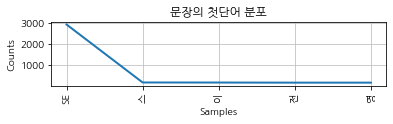

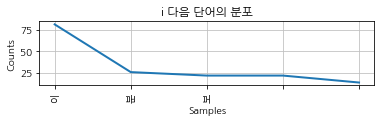

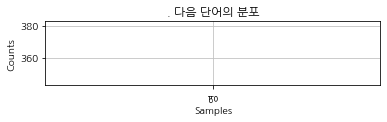

In [70]:
plt.subplot( 311 )
cdf[ "SS" ].plot( 5, title = "문장의 첫단어 분포" )
plt.subplot( 312 )
cdf[ "충" ].plot( 5, title = "i 다음 단어의 분포" )
plt.subplot( 313 )
cdf[ "촬" ].plot( 5, title = ". 다음 단어의 분포" )

#### NLTK ConditionalProbDist 클래스에 MLEProbDist 클래스 팩토리를 인수로 넣어 빈도 추정을 할 수 있다.

In [71]:
from nltk.probability import ConditionalProbDist, MLEProbDist

In [72]:
cpd = ConditionalProbDist( cdf, MLEProbDist )

#### ConditionalProbDist() 수행이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있다.

In [73]:
cdf[ "충" ].most_common( 5 )

[('이', 81), ('분', 26), ('보', 22), (' ', 22), ('격', 14)]

In [74]:
cpd[ "충" ].prob( "이" )

0.32793522267206476

In [75]:
cpd[ "충" ].prob( "분" )

0.10526315789473684

In [78]:
cpd[ "충" ].prob( "무" )

0.016194331983805668

In [79]:
cpd[ "충" ].prob( "로" )

0.0

In [80]:
cpd[ "영" ].prob( "화" )

0.7456445993031359

#### 무작위 문장 생성

In [81]:
from konlpy.tag import Okt

In [82]:
okt = Okt()

In [83]:
def tokenize( doc ):
    tokens = [ '/'.join( t ) for t in okt.pos( doc ) ]
    return tokens

In [85]:
tokenize( movie_new_comments[ 0 ] )

['충무로/Noun', '이/Determiner', '거/Noun', '어케/Noun', '하는거냐/Verb']

In [86]:
from tqdm import tqdm # progress bar 표현

sentences = []
for d in tqdm( movie_new_comments ):
    token = tokenize( d )
    bigram = ngrams( token, 2, pad_left = True, pad_right = True, left_pad_symbol = "SS",
                     right_pad_symbol = "SE" )
    sentences += [ t for t in bigram ]

100%|█████████████████████████████████████████████████████████████████████████████| 5888/5888 [00:10<00:00, 555.03it/s]


In [93]:
sentences[ :50 ]

[('SS', '충무로/Noun'),
 ('충무로/Noun', '이/Determiner'),
 ('이/Determiner', '거/Noun'),
 ('거/Noun', '어케/Noun'),
 ('어케/Noun', '하는거냐/Verb'),
 ('하는거냐/Verb', 'SE'),
 ('SS', 'SE'),
 ('SS', '촬영감독/Noun'),
 ('촬영감독/Noun', '의/Josa'),
 ('의/Josa', '영혼/Noun'),
 ('영혼/Noun', '까지/Josa'),
 ('까지/Josa', '갈아/Adverb'),
 ('갈아/Adverb', '넣은/Verb'),
 ('넣은/Verb', '마스터피스/Noun'),
 ('마스터피스/Noun', 'SE'),
 ('SS', 'SE'),
 ('SS', '오스카/Noun'),
 ('오스카/Noun', '작품/Noun'),
 ('작품/Noun', '상/Suffix'),
 ('상/Suffix', '탔어도/Verb'),
 ('탔어도/Verb', '할말/Verb'),
 ('할말/Verb', '없었을것/Adjective'),
 ('없었을것/Adjective', '같다/Adjective'),
 ('같다/Adjective', 'SE'),
 ('SS', 'SE'),
 ('SS', '주인공/Noun'),
 ('주인공/Noun', '을/Josa'),
 ('을/Josa', '카메라/Noun'),
 ('카메라/Noun', '가/Josa'),
 ('가/Josa', '계속/Noun'),
 ('계속/Noun', '따라가는데/Verb'),
 ('따라가는데/Verb', '세트/Noun'),
 ('세트/Noun', '장이/Suffix'),
 ('장이/Suffix', '엄청/Adverb'),
 ('엄청/Adverb', '넓은거에/Adjective'),
 ('넓은거에/Adjective', '놀랐습니다/Verb'),
 ('놀랐습니다/Verb', '직접/Noun'),
 ('직접/Noun', '1/Number'),
 ('1/Number', '차/Noun'),

In [88]:
# 단어별 빈도 계산 / 조건부 확률 계산
cfd = ConditionalFreqDist( sentences )
cpd = ConditionalProbDist( cfd, MLEProbDist )

In [89]:
def korea_most_common( c, n, pos = None ):
    if pos is None:
        return cfd[ tokenize( c )[ 0 ] ].most_common( n )
    else:
        return cfd[ "/".join( [ c, pos ] ) ].most_common( n )

In [90]:
korea_most_common( "충", 5 )

[('SE', 1), ('새/Modifier', 1)]

In [91]:
korea_most_common( "이", 5 )

[('영화/Noun', 155),
 ('게/Josa', 45),
 ('작품/Noun', 15),
 ('들/Suffix', 4),
 ('토록/Josa', 4)]

In [96]:
korea_most_common( "이", 5, "Determiner" )

[('거/Noun', 47), ('걸/Noun', 28), ('것/Noun', 9), ('정도/Noun', 6), ('때/Noun', 3)]

In [97]:
def korea_bigram_prob( c, w ):
    context = tokenize( c )[ 0 ]
    word = tokenize( w )[ 0 ]
    
    return cpd[ context ].prob( word )

In [98]:
korea_bigram_prob( "이", "영화" )

0.5290102389078498

In [99]:
korea_bigram_prob( "영화", "이" )

0.0014044943820224719

In [102]:
korea_bigram_prob( "주인공", "을" )

0.13043478260869565

In [103]:
korea_bigram_prob( "을", "주인공" )

0.0

In [104]:

# 무작위 문장 생성
def korea_generate_sentence( seed = None, debug = False ):
    if seed is not None:
        import random
        random.seed( seed )
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[ c ].generate()
        
        if w == "SE":
            break;
        w2 = w.split( "/" )[ 0 ]
        pos = w.split( "/" )[ 1 ]
        
        if c == "SS":
            sentence.append( w2.title() )
        elif c in [ "`", "\"", "'", "(" ]:
            sentence.append( w2 )
        elif w in [ "'", ".", ",", ")", ":", ";", "?" ]:
            sentence.append( w2 )
        elif pos in [ "Josa", "Punctuation", "Suffix" ]:
            sentence.append( w2 )
        elif w in [ "임/Noun", "것/Noun", "는걸/Noun", "릴때/Noun",
                    "되다/Verb", "이다/Verb", "하다/Verb", "이다/Adjective" ]:
            sentence.append( w2 )
        else:
            sentence.append( " " + w2 )
        c = w
        if debug:
            print( w )
    return "".join( sentence )

In [105]:
korea_generate_sentence( 0 )

'인생 작품상을 주는 영화 대한민국 Great'

In [106]:
korea_generate_sentence( 2 )

'지 자랑 멋 잇을 수가 없음 미션을 누비는 안될 정도'

In [107]:
korea_generate_sentence( 5 )

'영화 정말 소름 사견이지만 작품상 기생충 보다 보'